In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
 
# nacteni datove sady
iris = load_iris()
 
# jakeho typu je vlastne datova sada?
print(type(iris))
 
print("-" * 100)
 
# dostupne atributy a metody
print(dir(iris))

<class 'sklearn.utils._bunch.Bunch'>
----------------------------------------------------------------------------------------------------
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
data = iris.data
target = iris.target
target_names = iris.target_names
""" for n in target: 
  print (target_names[n]) """

' for n in target: \n  print (target_names[n]) '

In [3]:
# print(data[:, 0])
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specific artists can be excluded from the a

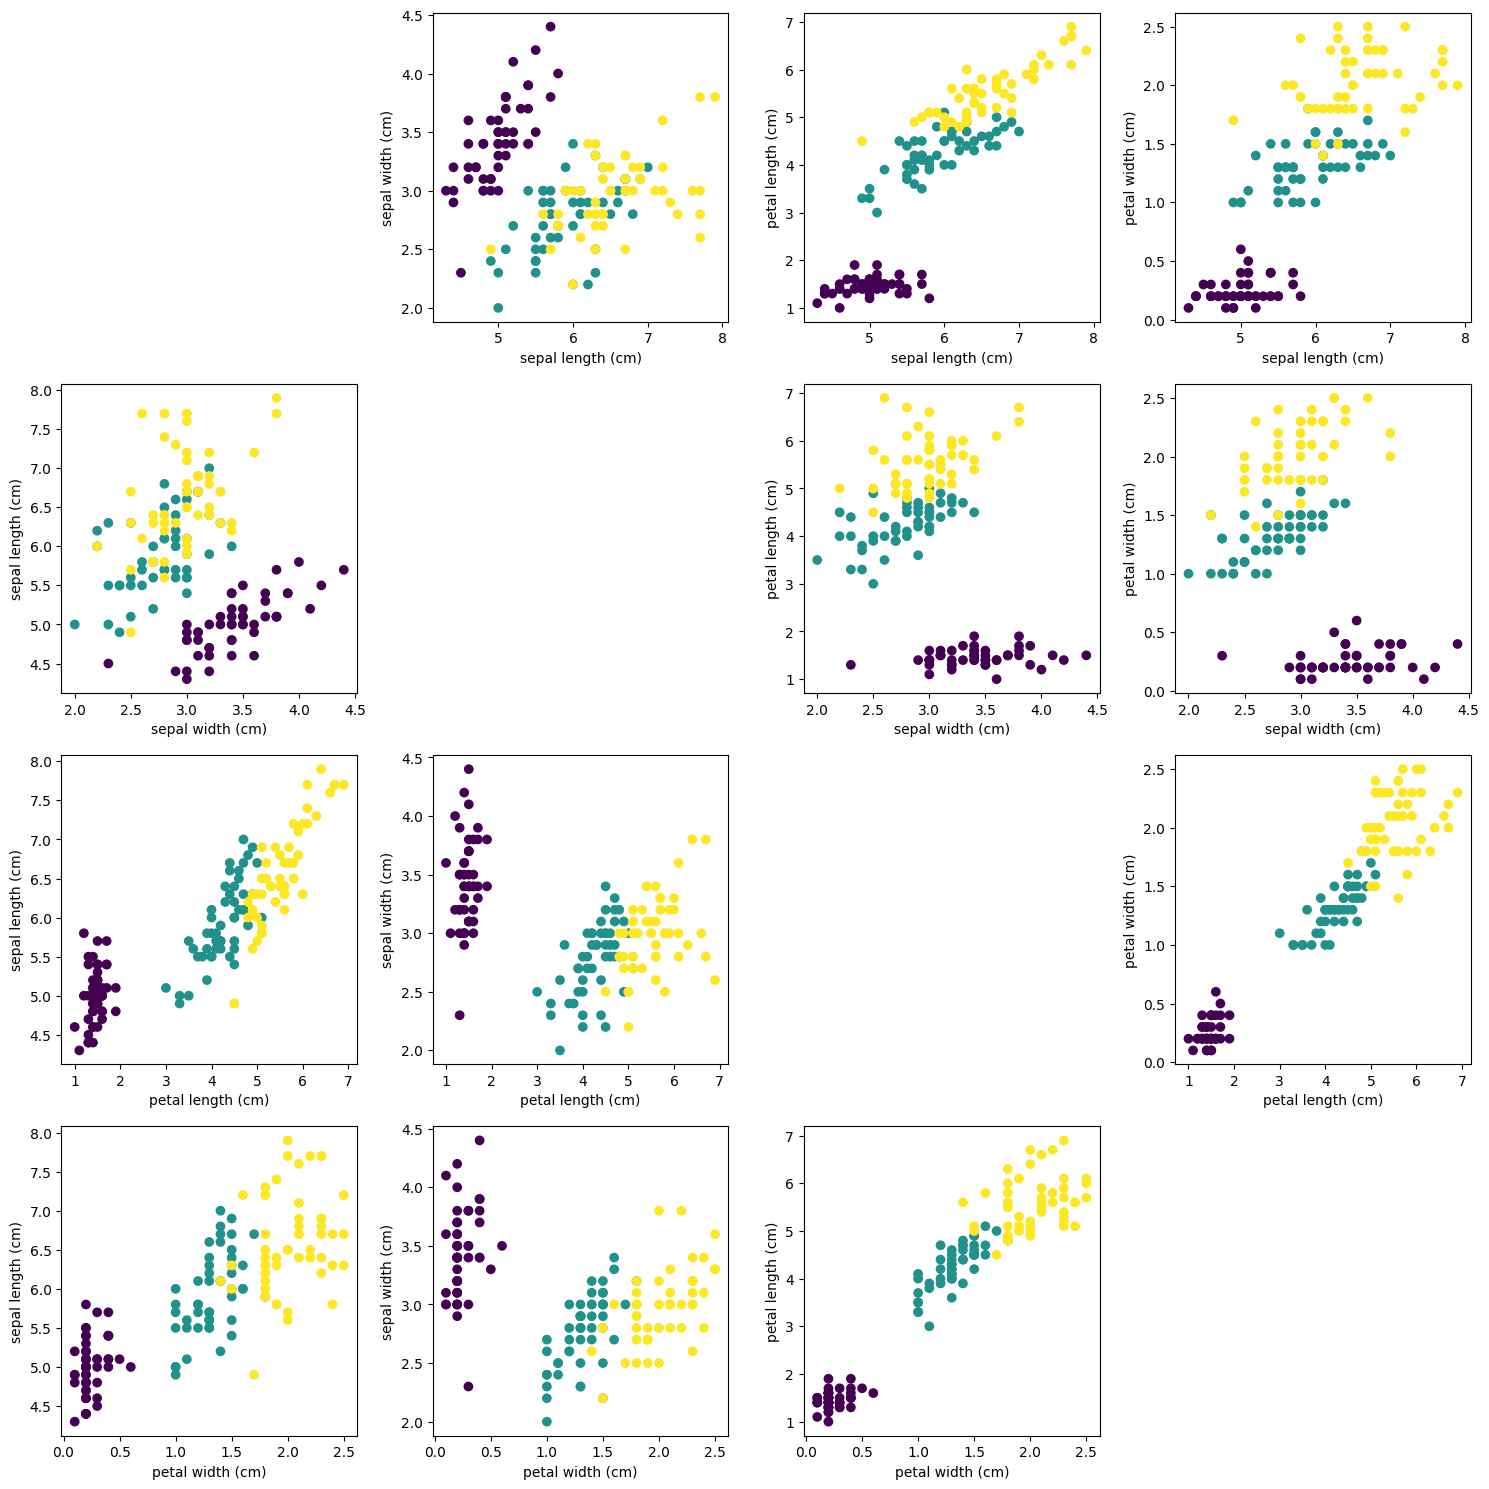

In [4]:
# vykresleni korelacniho diagramu pro dvojici vybranych atributu
# první sloupec: x-ové souřadnice
# druhý sloupec: y-ové souřadnice
# 
# plt.title("Classes")
# vykresleni mrizky korelacnich diagramu
fig, axes = plt.subplots(nrows=4, ncols=4)

# rozmery grafu
fig.set_figheight(15)
fig.set_figwidth(15)

# vyplneni mrizky
for row in range(4):
    for column in range(4):
        ax = axes[row][column]
        if row == column:
            # na diagonale jsou prazdna mista
            fig.delaxes(ax)
            continue
        # pridat korelacni diagram do mrizky
        scatter = ax.scatter(data[:, row], data[:, column], c=iris.target)
        # popisky os
        ax.set(xlabel=iris.feature_names[row], ylabel=iris.feature_names[column])
 
 
# zbavit se prazdneho mista okolo bunek mrizky
plt.tight_layout()

# ulozeni diagramu do souboru
plt.savefig("52.png")
 
# zobrazeni diagramu
plt.show()

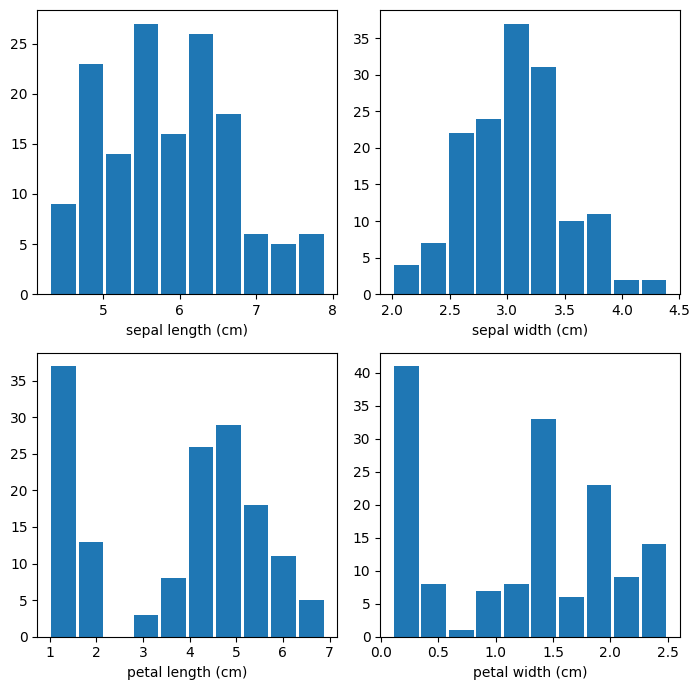

In [13]:
# vykresleni sady histogramu do mrizky
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(7)
fig.set_figwidth(7)
 
# vykresleni jednotlivych histogramu do mrizky
for i in range(4):
    ax = axes[i//2][i%2]
    ax.hist(data[:, i], bins=10, histtype='bar', rwidth=0.9)
    ax.set(xlabel=iris.feature_names[i])
 
 
# zbavit se prazdneho mista okolo bunek mrizky
plt.tight_layout()
 
# ulozeni diagramu do souboru
plt.savefig("53.png")
 
# zobrazeni diagramu
plt.show()

In [75]:
""" for i in range(4):
    print(i//2, i%2) # [i//2,[i%2] """

# print out all combinations of matrix array 2,2 where the sum of (x,y) is unique
# that mean the sum of the index is 1,2,3,4
def generuj_matice(max_x:int, max_y:int) -> np.ndarray:
  iq = []
  for x in range(max_x):
    for y in range(max_y):
      if [x,y] not in iq and [y,x] not in iq and x!=y:      
        iq.append([x,y])    
  return np.array(iq)

mat = generuj_matice(4,4)




[[0 1]
 [0 2]
 [0 3]
 [1 2]
 [1 3]
 [2 3]]


In [59]:
pca = PCA(n_components=4, svd_solver='full', power_iteration_normalizer='LU')
pca = pca.fit(data)
reduced = pca.transform(data[0:2])
print(pca.explained_variance_ratio_)
print(data[0:2])
print(reduced.shape)

[0.92461872 0.05306648 0.01710261 0.00521218]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
(2, 4)


In [52]:
reduced = PCA(n_components=2).fit_transform(data)
# print(data)
print(reduced[1])

[-2.71414169 -0.17700123]


In [64]:
reduced = PCA(n_components=4).fit_transform(data)
# print(data)
print(reduced[:,3])

[ 2.26243707e-03  9.90265503e-02  1.99683897e-02 -7.55758166e-02
 -6.12585926e-02 -2.42008576e-02 -4.81431065e-02 -4.52978706e-02
 -2.67447358e-02 -5.62954013e-02 -1.50199245e-02 -1.56379208e-01
 -7.88791149e-03 -2.16798118e-02  1.59209718e-01  6.55154587e-03
  1.67734737e-01  7.76281796e-02  2.70518681e-02 -6.62726502e-02
 -1.50707908e-02  4.10654027e-02  4.48212505e-03  1.48352589e-01
 -3.00330904e-01  3.46074722e-02  5.74497158e-02 -1.41727423e-02
  6.57834667e-02 -1.23983306e-01 -6.04622767e-02  2.31628492e-01
 -2.81372347e-01 -9.53488583e-02  1.90703413e-02  1.62598446e-01
  1.76441213e-01 -1.68173054e-01 -1.07331474e-02 -1.37491513e-02
  9.40633590e-02  3.19987487e-01 -7.46777682e-02  1.76208890e-01
 -1.82842502e-01  1.42843574e-01 -1.89622291e-01 -5.95642283e-02
 -4.65686438e-02  3.46583385e-02  1.85252879e-02  5.66512106e-04
 -1.65317587e-03  9.35668402e-02  1.12020574e-01 -2.43116767e-01
 -8.35565724e-02 -1.79077226e-02 -3.91345020e-02 -5.61891788e-03
  4.55624408e-02  5.07192

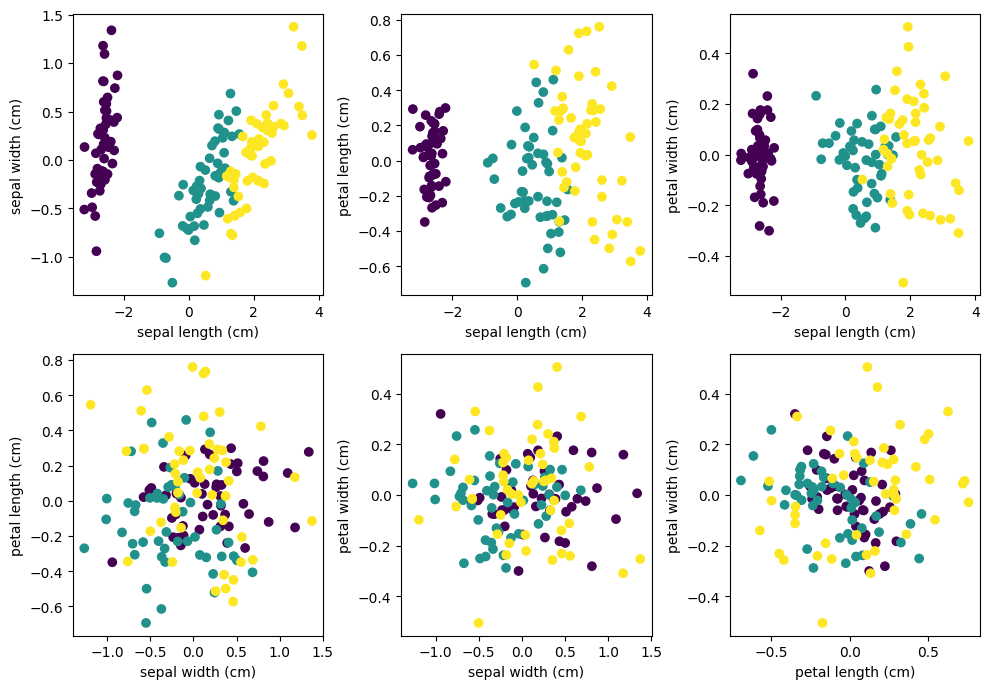

In [67]:
# Principal component analysis
reduced = PCA(n_components=4).fit_transform(data)
 
# vykresleni vysledku do matice s diagramy
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(7)
fig.set_figwidth(10)
 
# graf v matici
ax = axes[0][0]
scatter = ax.scatter(reduced[:, 0], reduced[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
 
# graf v matici
ax = axes[0][1]
scatter = ax.scatter(reduced[:, 0], reduced[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[2])
# graf v matici
ax = axes[0][2]
scatter = ax.scatter(reduced[:, 0], reduced[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[3])

# graf v matici
ax = axes[1][0]
scatter = ax.scatter(reduced[:, 1], reduced[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2])

ax = axes[1][1]
scatter = ax.scatter(reduced[:, 1], reduced[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[3])

ax = axes[1][2]
scatter = ax.scatter(reduced[:, 2], reduced[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])


# zbavit se prazdneho mista okolo bunek mrizky
plt.tight_layout()
 
# ulozeni diagramu do souboru
plt.savefig("55.png")
 
# zobrazeni diagramu
plt.show()